# Tarea 1: Eugenio Paz Rodríguez

El efecto de la cuarentena ha sido debatido en el mundo entero: no por su contribución a la baja de casos (obviamente funciona) sino por su impacto en las redes socio-económica de los países. En Chile, el efecto regional es poco conocido.

Su tarea es mostrar y explicar, en 16 gráficos (uno por región), como fue la evolución de la cuarentena (por día) y contestar las siguientes 2 preguntas: 
1) ¿Qué dia hubo la mayor cantidad de personas en cuarentena en cada región?

2) ¿Qué día hubo la mayor cantidad de personas en cuarentena en el país?

## 1. Importamos Librerias:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
from scipy import stats
from statsmodels import robust
%matplotlib inline

## 2. Cargamos DataFrames:

####  DP29 - Cuarentenas Activas e Históricas: Descripción:
##### Columnas y valores:  

**Nombre**: Nombre descriptivo de la zona de cuarentena.  
**Estado**: Valor codificado para estado de la cuarentena: Activa, No Activa, Futura, Sin Información.  
**Alcance**: Valor codificado para el alcance territorial de la cuarentena Comuna completa, Área Urbana Completa, Área Rural Completa, Sector Específico.  
**Fecha de Inicio**: Fecha y hora de inicio en tiempo UTC -4.  
**Fecha de Término**: Fecha y hora de término en tiempo UTC -4.  
**Código CUT Comuna**: Código Único Territorial de comuna asociada.  
**Detalle**: Observaciones adicionales al alcance de la cuarentena.  
**Superficie en m2**.  
**Perímetro en m**.  

#### DP1 - Casos totales por comuna incremental:
##### Columnas y valores:  

**Región.**  
**Código Región.**  
**Comuna.**  
**Código comuna.**  
**Población.**  
**Múltiples columnas correspondientes a '[fecha]'.**: contienen los 'Casos Confirmados' reportados por el Ministerio de Salud de Chile en cada una de las fechas que se indican en las respectivas columnas.  
**Tasa**: La columna 'Tasa' contiene el número de casos confirmados por cada 100 mil habitantes de una población. 



### DataFrame (DP29):

In [2]:
DP29 = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master'
                     '/output/producto29/Cuarentenas-Totales.csv?raw=true', 
                   encoding='utf-8',
                   sep=',')
DP29

,ID,Nombre,Estado,Alcance,Fecha de Inicio,Fecha de Término,Código CUT Comuna,Detalle,Superficie en m2,Perímetro en m,Region,n_REGION
0,1,Arica,Histórica,Área Urbana Completa,2020-04-16 22:00:00,2020-05-15 22:00:00,15101,Corresponde al Radio Urbano de la Ciudad de Ar...,28050418.80,48722.30001,15,R15
1,2,Santiago Norte,Histórica,Sector Específico,2020-04-13 05:00:00,2020-05-05 22:00:00,13101,Corresponde a la extensión de la cuarentena en...,19939218.57,21599.35134,13,R13
2,3,Puente Alto Poniente,Histórica,Sector Específico,2020-04-09 22:00:00,2020-05-08 22:00:00,13201,Corresponde al sector delimitado por la Av. Co...,42364268.21,30428.05152,13,R13
3,4,El Bosque,Histórica,Comuna completa,2020-04-16 22:00:00,2020-09-21 05:00:00,13105,Aplicada a la totalidad de la comuna. Se incor...,20622713.23,18788.87075,13,R13
4,5,San Bernardo Nororiente,Histórica,Sector Específico,2020-04-16 22:00:00,2020-05-08 22:00:00,13401,Corresponde al sector delimitado por los limit...,16326216.83,24929.14572,13,R13
...,...,...,...,...,...,...,...,...,...,...,...,...
182,183,Angol,Activa,NaN,2020-12-10 05:00:00,2020-12-25 22:00:00,9201,NaN,NaN,NaN,9,R09
183,184,Cabo de Hornos,Activa,NaN,2020-12-10 05:00:00,2020-12-25 22:00:00,12201,NaN,NaN,NaN,12,R12
184,185,Los Ángeles,Activa,NaN,2020-12-12 05:00:00,2020-12-25 22:00:00,8301,NaN,NaN,NaN,8,R08
185,186,Paillaco,Histórica,NaN,2020-12-12 05:00:00,2020-12-23 05:00:00,14107,NaN,NaN,NaN,14,R14


## 3. Entendimiento del DataSet (DP29):

In [3]:
#Saber la cantidad de filas y columnas
print('El número de filas es: ',DP29.shape[0],'\nEl numero de columans es: ',DP29.shape[1])

El número de filas es:  187 
El numero de columans es:  12


In [4]:
#Saber los encabezados
print(DP29.columns.values)

['ID' 'Nombre' 'Estado' 'Alcance' 'Fecha de Inicio' 'Fecha de Término'
 'Código CUT Comuna' 'Detalle' 'Superficie en m2' 'Perímetro en m'
 'Region' 'n_REGION']


In [5]:
#Saber toda la info básica del dataset
DP29.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 187 non-null    int64  
 1   Nombre             187 non-null    object 
 2   Estado             187 non-null    object 
 3   Alcance            99 non-null     object 
 4   Fecha de Inicio    187 non-null    object 
 5   Fecha de Término   187 non-null    object 
 6   Código CUT Comuna  187 non-null    int64  
 7   Detalle            99 non-null     object 
 8   Superficie en m2   99 non-null     float64
 9   Perímetro en m     99 non-null     float64
 10  Region             187 non-null    int64  
 11  n_REGION           187 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 17.7+ KB


In [6]:
#Eliminar datos nulos
#DP29=DP29.dropna()

In [7]:
#Cambiamos tipo de datos de columnas (Solo lo dejo para tener el registro, no lo necesitamos en este ejercicio)

#DP29['Código CUT Comuna'].astype(int)

In [8]:
#Para eliminar columnas

#DP29.drop(['Detalle', 'Superficie en m2','Perímetro en m','Alcance'], axis=1, inplace=True)

In [9]:
#Para cambiar el nombre de las columnas

#DP29=DP29.rename(columns={'Código CUT Comuna':'Codigo comuna'})

## 4. Limpieza y Preparación de datos (DP29):

A continuación, extraeremos solo las columnas que nos servirán para responder el enunciado.  
Limpiaremos las columnas de fechas.  
Ordenaremos las columnas para ubicar la región al comienzo.  
Ordenaremos en orden descendente según región.

In [10]:
df1 = pd.DataFrame(DP29)[['Region','Código CUT Comuna', 'Fecha de Inicio','Fecha de Término']]
df1

,Region,Código CUT Comuna,Fecha de Inicio,Fecha de Término
0,15,15101,2020-04-16 22:00:00,2020-05-15 22:00:00
1,13,13101,2020-04-13 05:00:00,2020-05-05 22:00:00
2,13,13201,2020-04-09 22:00:00,2020-05-08 22:00:00
3,13,13105,2020-04-16 22:00:00,2020-09-21 05:00:00
4,13,13401,2020-04-16 22:00:00,2020-05-08 22:00:00
...,...,...,...,...
182,9,9201,2020-12-10 05:00:00,2020-12-25 22:00:00
183,12,12201,2020-12-10 05:00:00,2020-12-25 22:00:00
184,8,8301,2020-12-12 05:00:00,2020-12-25 22:00:00
185,14,14107,2020-12-12 05:00:00,2020-12-23 05:00:00


In [11]:
#Aplicamos formato timestamp
df1['Fecha de Inicio'] = df1['Fecha de Inicio'].apply(pd.to_datetime)
df1['Fecha de Término'] = df1['Fecha de Término'].apply(pd.to_datetime)
#Nos quita las horas de la fecha, pero transforma la columna a tipo "str"
df1['Fecha de Inicio'] = df1['Fecha de Inicio'].dt.strftime('%Y-%m-%d')
df1['Fecha de Término'] = df1['Fecha de Término'].dt.strftime('%Y-%m-%d')
#Volvemos a aplicar formato timestamp
df1['Fecha de Inicio'] = df1['Fecha de Inicio'].apply(pd.to_datetime)
df1['Fecha de Término'] = df1['Fecha de Término'].apply(pd.to_datetime)
print(type(df1['Fecha de Inicio'][2]))
print(type(df1['Fecha de Término'][2]))
df1


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Region,Código CUT Comuna,Fecha de Inicio,Fecha de Término
0,15,15101,2020-04-16,2020-05-15
1,13,13101,2020-04-13,2020-05-05
2,13,13201,2020-04-09,2020-05-08
3,13,13105,2020-04-16,2020-09-21
4,13,13401,2020-04-16,2020-05-08
...,...,...,...,...
182,9,9201,2020-12-10,2020-12-25
183,12,12201,2020-12-10,2020-12-25
184,8,8301,2020-12-12,2020-12-25
185,14,14107,2020-12-12,2020-12-23


In [12]:
df1.sort_values('Region',ascending=True)

,Region,Código CUT Comuna,Fecha de Inicio,Fecha de Término
56,1,1107,2020-05-15,2020-10-03
57,1,1101,2020-05-15,2020-10-03
79,1,1401,2020-06-12,2020-09-28
91,2,2102,2020-06-23,2020-09-28
76,2,2201,2020-06-12,2020-09-21
...,...,...,...,...
142,16,16302,2020-10-03,2020-10-26
120,16,16103,2020-09-02,2020-10-03
119,16,16101,2020-09-02,2020-10-03
19,16,16103,2020-03-30,2020-04-23


In [13]:
#Cambiamos el nombre a "Region" por "Codigo region" para que tengamos claridad en la distinción de títulos y luego uniremos por 
#Codigo region
df1 = df1.rename(columns={'Region':'Numero_Region','Código CUT Comuna':'Codigo_Comuna'})
df1

,Numero_Region,Codigo_Comuna,Fecha de Inicio,Fecha de Término
0,15,15101,2020-04-16,2020-05-15
1,13,13101,2020-04-13,2020-05-05
2,13,13201,2020-04-09,2020-05-08
3,13,13105,2020-04-16,2020-09-21
4,13,13401,2020-04-16,2020-05-08
...,...,...,...,...
182,9,9201,2020-12-10,2020-12-25
183,12,12201,2020-12-10,2020-12-25
184,8,8301,2020-12-12,2020-12-25
185,14,14107,2020-12-12,2020-12-23


### DataFrame (DP1):

In [14]:
DP1 = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master'
                     '/output/producto1/Covid-19.csv?raw=true', 
                   encoding='utf-8',
                   sep=',')
DP1

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-09-10,2021-09-13,2021-09-17,2021-09-20,2021-09-24,2021-09-27,2021-10-01,2021-10-04,2021-10-08,Tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,29763.0,29836.0,29929.0,30002.0,30128.0,30239.0,30376.0,30463.0,30536.0,12335.2
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,67.0,67.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,5677.2
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,10864.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,205.0,207.0,208.0,207.0,211.0,215.0,213.0,213.0,213.0,8469.2
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,158.0,163.0,161.0,163.0,165.0,165.0,167.0,170.0,175.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Magallanes,12,Rio Verde,12103.0,211.0,0.0,0.0,0.0,0.0,0.0,...,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,8056.9
358,Magallanes,12,San Gregorio,12104.0,681.0,0.0,0.0,0.0,0.0,0.0,...,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,10866.4
359,Magallanes,12,Timaukel,12303.0,282.0,0.0,0.0,0.0,0.0,0.0,...,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,14893.6
360,Magallanes,12,Torres del Paine,12402.0,1021.0,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,2154.8


## 3. Entendimiento del DataSet (DP1):

In [15]:
#Saber la cantidad de filas y columnas
print('El número de filas es: ',DP1.shape[0],'\nEl numero de columans es: ',DP1.shape[1])

El número de filas es:  362 
El numero de columans es:  168


In [16]:
#Saber los encabezados
print(DP1.columns.values)

['Region' 'Codigo region' 'Comuna' 'Codigo comuna' 'Poblacion'
 '2020-03-30' '2020-04-01' '2020-04-03' '2020-04-06' '2020-04-08'
 '2020-04-10' '2020-04-13' '2020-04-15' '2020-04-17' '2020-04-20'
 '2020-04-24' '2020-04-27' '2020-05-01' '2020-05-04' '2020-05-08'
 '2020-05-11' '2020-05-15' '2020-05-18' '2020-05-22' '2020-05-25'
 '2020-05-29' '2020-06-01' '2020-06-05' '2020-06-08' '2020-06-12'
 '2020-06-15' '2020-06-19' '2020-06-23' '2020-06-28' '2020-07-01'
 '2020-07-05' '2020-07-10' '2020-07-13' '2020-07-17' '2020-07-20'
 '2020-07-24' '2020-07-27' '2020-07-31' '2020-08-03' '2020-08-07'
 '2020-08-10' '2020-08-14' '2020-08-17' '2020-08-21' '2020-08-24'
 '2020-08-28' '2020-08-31' '2020-09-04' '2020-09-07' '2020-09-11'
 '2020-09-14' '2020-09-18' '2020-09-21' '2020-09-25' '2020-09-28'
 '2020-10-02' '2020-10-05' '2020-10-09' '2020-10-12' '2020-10-16'
 '2020-10-19' '2020-10-24' '2020-10-26' '2020-10-30' '2020-11-02'
 '2020-11-06' '2020-11-09' '2020-11-13' '2020-11-16' '2020-11-20'
 '2020-11-23'

In [17]:
#Saber toda la info básica del dataset
DP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Columns: 168 entries, Region to Tasa
dtypes: float64(165), int64(1), object(2)
memory usage: 475.2+ KB


## 4. Limpieza y Preparación de datos (DP1):

A continuación, extraeremos solo las columnas que nos servirán para responder el enunciado.  
Eliminaremos las columnas de fechas.  
Ordenaremos las columnas para ubicar la región al comienzo.  
Ordenaremos en orden descendente según región.

In [18]:
#Duplicando el DS para dejar solo las columnas que no servirán
df2 = pd.DataFrame(DP1)[['Region','Comuna','Codigo comuna','Poblacion']]
df2

,Region,Comuna,Codigo comuna,Poblacion
0,Arica y Parinacota,Arica,15101.0,247552.0
1,Arica y Parinacota,Camarones,15102.0,1233.0
2,Arica y Parinacota,General Lagos,15202.0,810.0
3,Arica y Parinacota,Putre,15201.0,2515.0
4,Arica y Parinacota,Desconocido Arica y Parinacota,NaN,NaN
...,...,...,...,...
357,Magallanes,Rio Verde,12103.0,211.0
358,Magallanes,San Gregorio,12104.0,681.0
359,Magallanes,Timaukel,12303.0,282.0
360,Magallanes,Torres del Paine,12402.0,1021.0


In [19]:
#Renombramos columnas
df2 = df2.rename(columns={'Region':'Nombre_Region','Comuna':'Nombre_Comuna','Codigo comuna':'Codigo_Comuna'})
df2

,Nombre_Region,Nombre_Comuna,Codigo_Comuna,Poblacion
0,Arica y Parinacota,Arica,15101.0,247552.0
1,Arica y Parinacota,Camarones,15102.0,1233.0
2,Arica y Parinacota,General Lagos,15202.0,810.0
3,Arica y Parinacota,Putre,15201.0,2515.0
4,Arica y Parinacota,Desconocido Arica y Parinacota,NaN,NaN
...,...,...,...,...
357,Magallanes,Rio Verde,12103.0,211.0
358,Magallanes,San Gregorio,12104.0,681.0
359,Magallanes,Timaukel,12303.0,282.0
360,Magallanes,Torres del Paine,12402.0,1021.0


In [20]:
# Eliminamos datos NaN
df2=df2.dropna()
df2

,Nombre_Region,Nombre_Comuna,Codigo_Comuna,Poblacion
0,Arica y Parinacota,Arica,15101.0,247552.0
1,Arica y Parinacota,Camarones,15102.0,1233.0
2,Arica y Parinacota,General Lagos,15202.0,810.0
3,Arica y Parinacota,Putre,15201.0,2515.0
5,Tarapacá,Alto Hospicio,1107.0,129999.0
...,...,...,...,...
356,Magallanes,Punta Arenas,12101.0,141984.0
357,Magallanes,Rio Verde,12103.0,211.0
358,Magallanes,San Gregorio,12104.0,681.0
359,Magallanes,Timaukel,12303.0,282.0


## 5. Unión de tablas (DP29 y DP1):

A continuación uniremos las dos tablas

In [21]:
# Unimos tablas por Codigo comuna
df_unidos = df1.merge(df2, on='Codigo_Comuna')

# Re ordenamos columnas
df_unidos = df_unidos[['Numero_Region','Nombre_Region','Codigo_Comuna','Nombre_Comuna','Fecha de Inicio','Fecha de Término','Poblacion']]
df_unidos

,Numero_Region,Nombre_Region,Codigo_Comuna,Nombre_Comuna,Fecha de Inicio,Fecha de Término,Poblacion
0,15,Arica y Parinacota,15101,Arica,2020-04-16,2020-05-15,247552.0
1,15,Arica y Parinacota,15101,Arica,2020-07-14,2020-11-09,247552.0
2,13,Metropolitana,13101,Santiago,2020-04-13,2020-05-05,503147.0
3,13,Metropolitana,13101,Santiago,2020-03-26,2020-04-13,503147.0
4,13,Metropolitana,13101,Santiago,2020-05-05,2020-08-17,503147.0
...,...,...,...,...,...,...,...
182,8,Biobío,8202,Arauco,2020-12-10,2020-12-25,38679.0
183,9,Araucanía,9206,Los Sauces,2020-12-10,2020-12-23,7517.0
184,8,Biobío,8301,Los Angeles,2020-12-12,2020-12-25,218515.0
185,14,Los Ríos,14107,Paillaco,2020-12-12,2020-12-23,20798.0


## 6. Graficos (DP29 y DP1):

Se ordenará y generarán gráficos correspondientes.

In [22]:
print(df_unidos['Fecha de Inicio'].min())
print(df_unidos['Fecha de Inicio'].max())

2020-03-12 00:00:00
2020-12-12 00:00:00


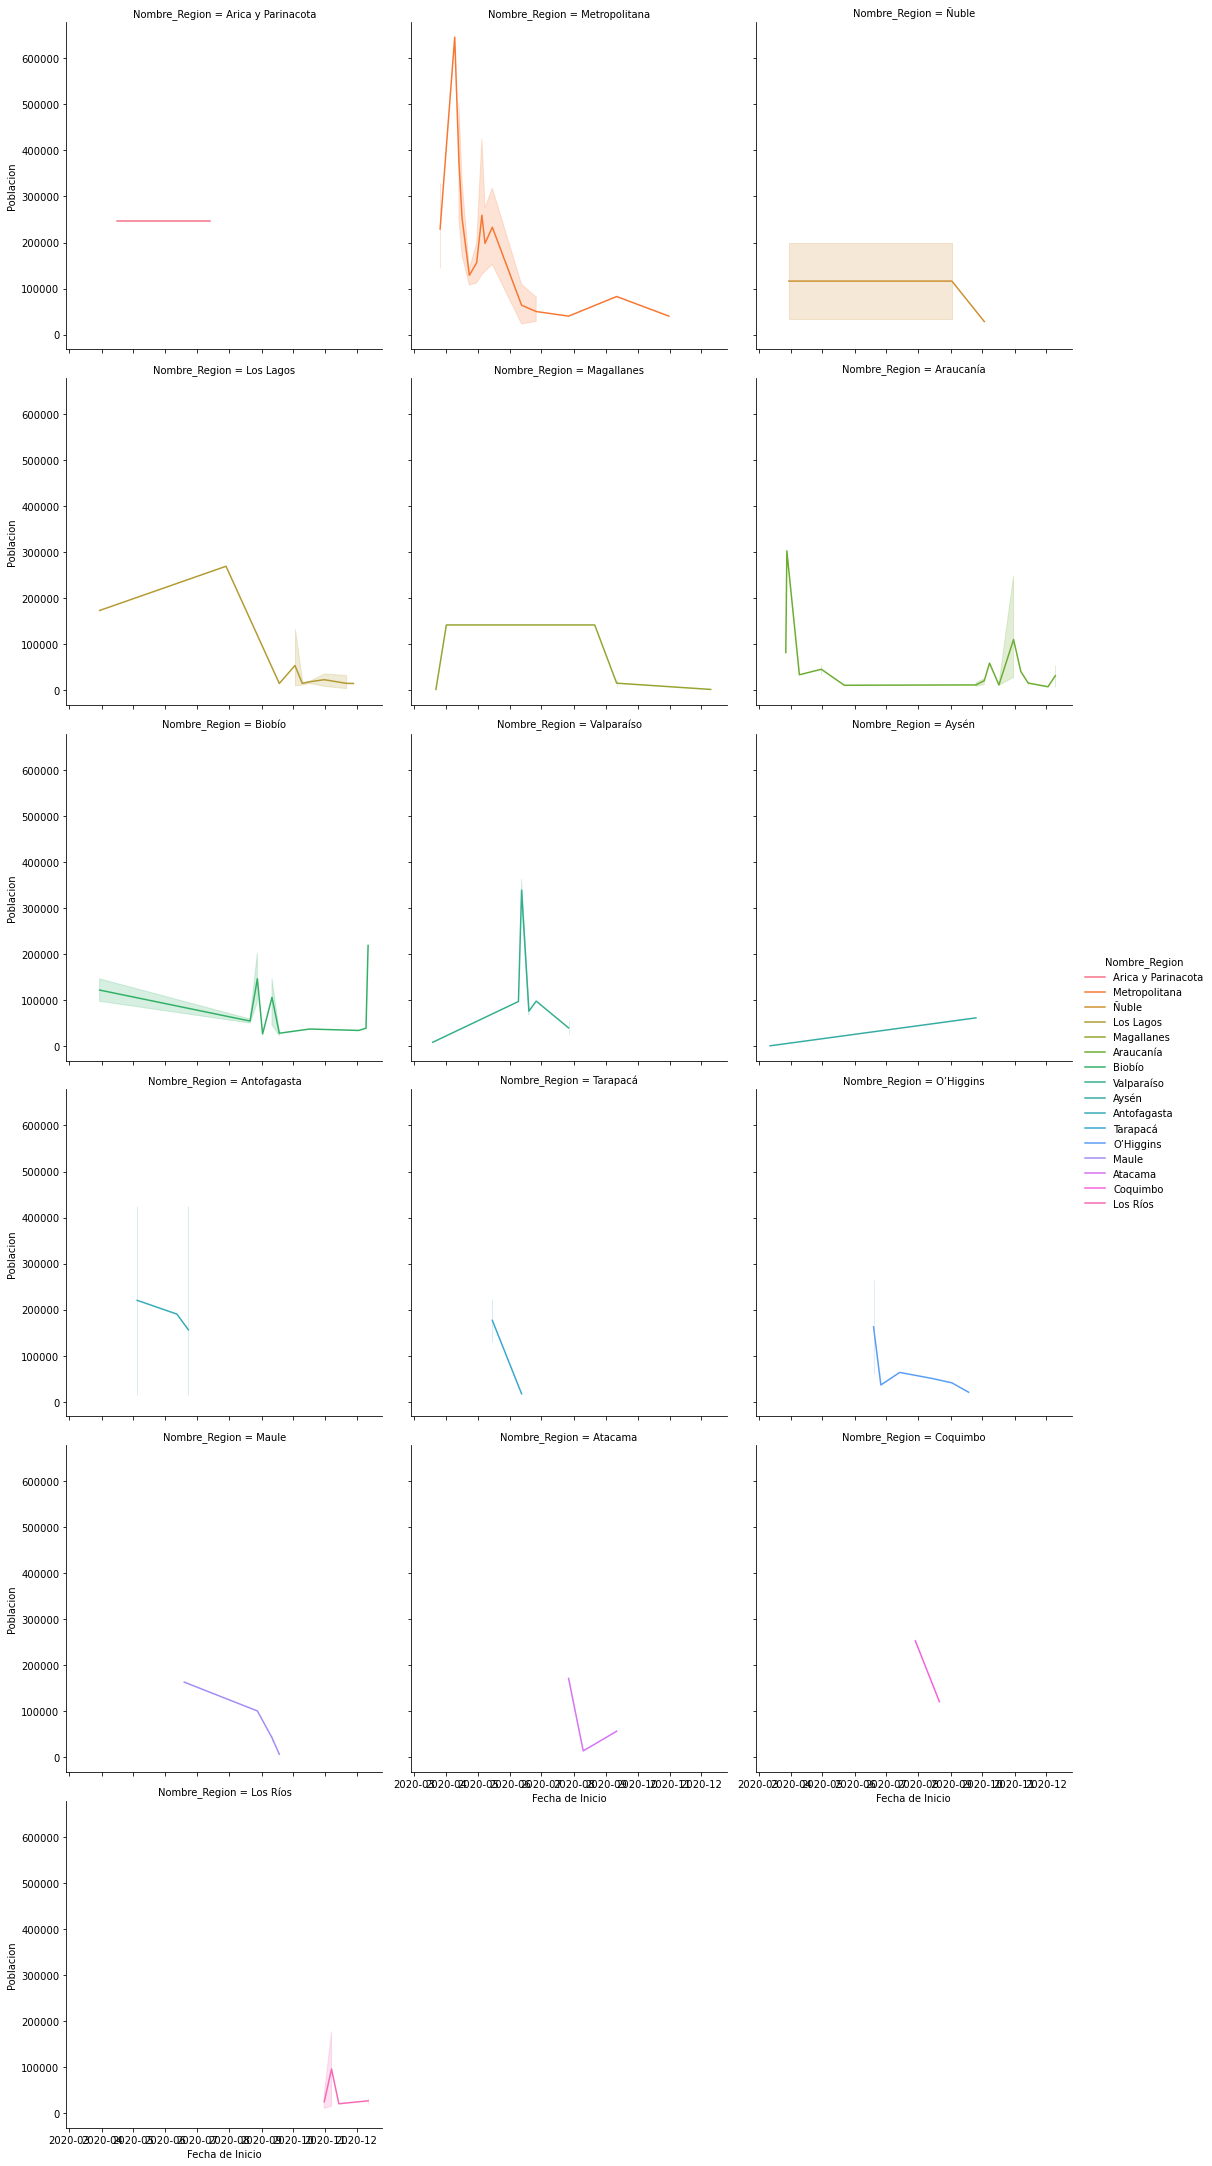

In [23]:
sns.relplot(data=df_unidos, x="Fecha de Inicio", y="Poblacion", hue="Nombre_Region", 
            col="Nombre_Region", col_wrap=3, kind="line")

**1) ¿Qué dia hubo la mayor cantidad de personas en cuarentena en cada región?**


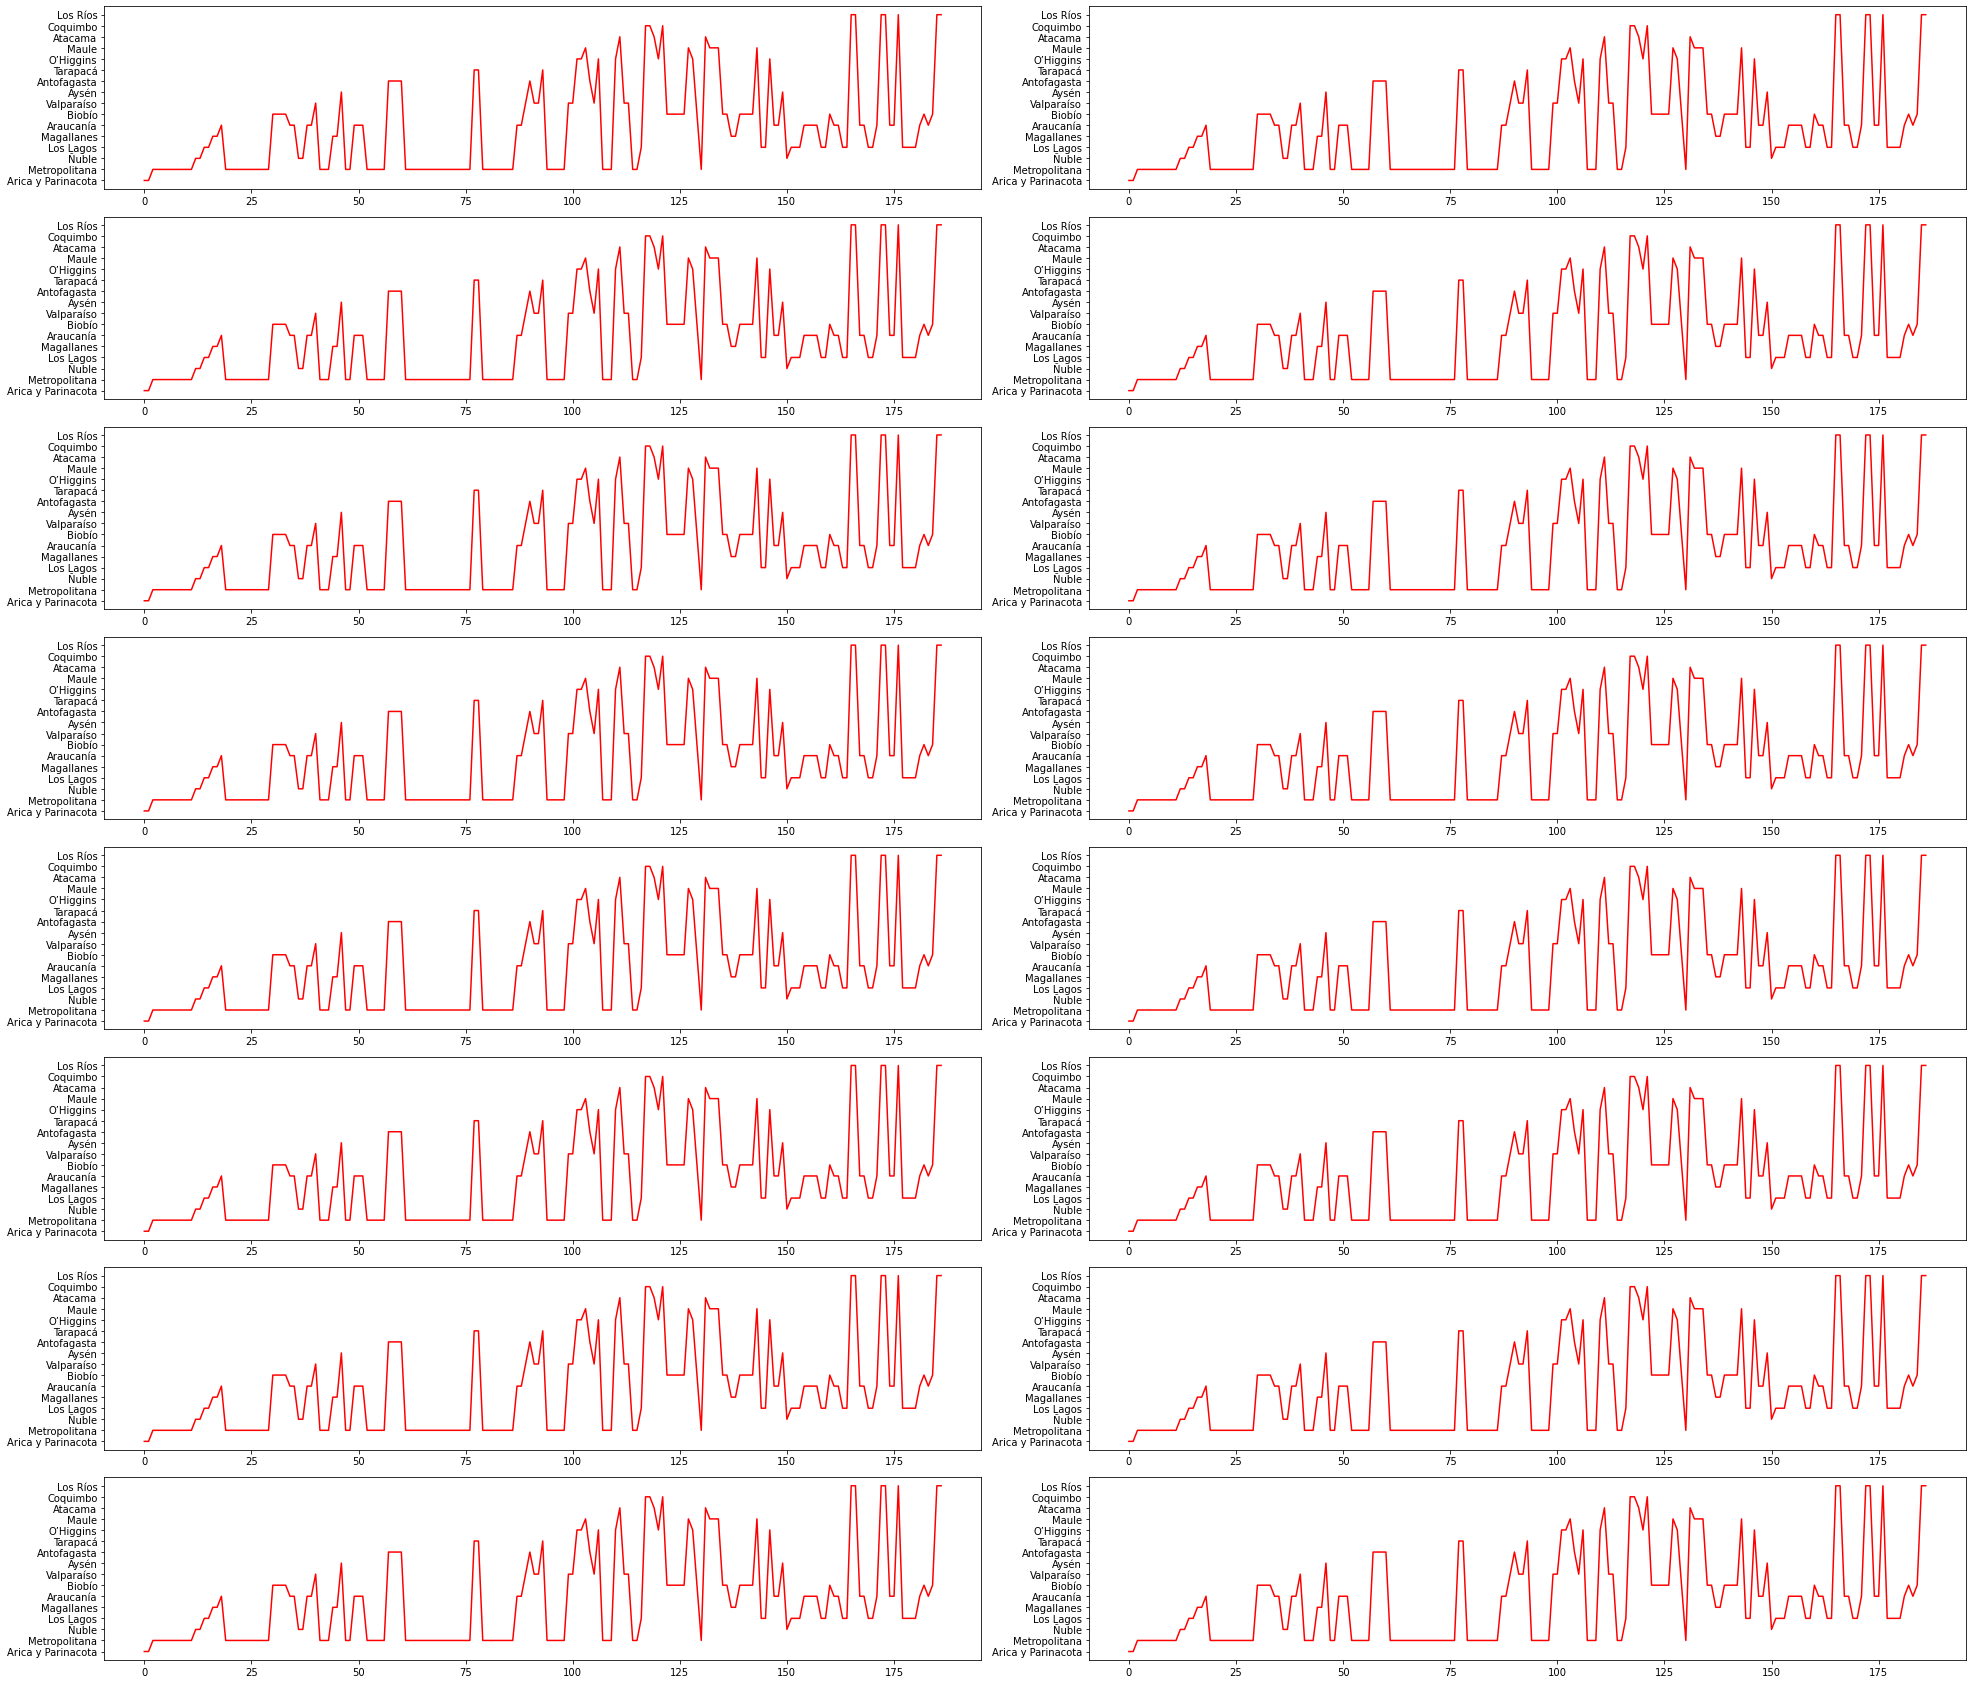

In [24]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [27.50, 23.50]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(8, 2)

""" Iterate column's axes"""
def iterate_columns(cols, x):
   for col in cols:
      col.plot(x, color='red')

""" Iterate row's axes"""
for row in axes:
   x = df_unidos['Nombre_Region']
   iterate_columns(row, x)

plt.show()